In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

os.makedirs("../images", exist_ok=True)

,Activation,Accuracy
0,logistic,0.95614
1,tanh,0.95614
2,relu,0.95614


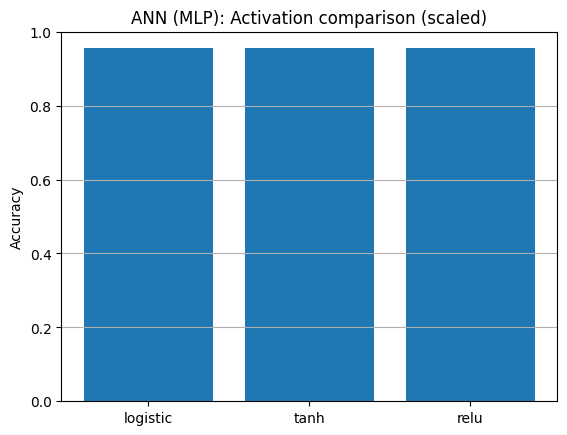

Best activation: logistic acc= 0.956140350877193


In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

activations = ["logistic", "tanh", "relu"]
rows = []
models = {}

for act in activations:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("mlp", MLPClassifier(
            hidden_layer_sizes=(20,),
            activation=act,
            max_iter=2000,
            random_state=42
        ))
    ])
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    rows.append((act, acc))
    models[act] = model

results_df = pd.DataFrame(rows, columns=["Activation", "Accuracy"]).sort_values("Accuracy", ascending=False)
display(results_df)

plt.figure()
plt.bar(results_df["Activation"], results_df["Accuracy"])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("ANN (MLP): Activation comparison (scaled)")
plt.grid(axis="y")
plt.savefig("../images/week02_ann_activation_comparison.png", dpi=200, bbox_inches="tight")
plt.show()

best_act = results_df.iloc[0]["Activation"]
best_acc = results_df.iloc[0]["Accuracy"]
print("Best activation:", best_act, "acc=", best_acc)

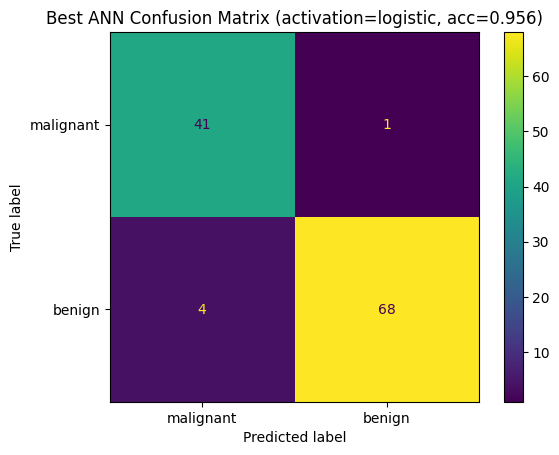

In [3]:
best_model = models[best_act]
pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot()
plt.title(f"Best ANN Confusion Matrix (activation={best_act}, acc={best_acc:.3f})")
plt.savefig("../images/week02_ann_confusion_matrix.png", dpi=200, bbox_inches="tight")
plt.show()